In [56]:
# Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from PIL import Image
    
# Basic chart
df = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="marvel")
df2 = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="movieCast")
df3 = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="actor")
df.head()
df2.head()



,TITLE,CAST
0,Avengers: Age of Ultron,Aaron Taylor-Johnson
1,Ant-Man and the Wasp,Abby Ryder Fortson
2,Iron Man 2,Adam DJ AM Goldstein
3,Thor: The Dark World,Adewale Akinnuoye-Agbaje
4,Doctor Strange,Alaa Safi


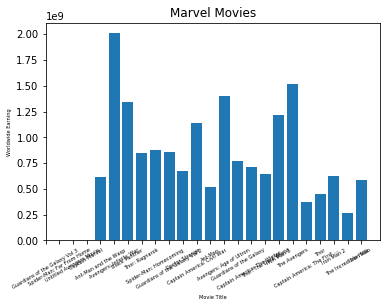

In [24]:

    # this is for plotting purpose
index = np.arange(len(df['TITLE']))
plt.bar(index, df['WORLDWIDE BOX OFFICE'])
plt.xlabel('Movie Title', fontsize=5)
plt.ylabel('Worldwide Earning', fontsize=5)
plt.xticks(index, df['TITLE'], fontsize=5, rotation=30)
plt.title('Marvel Movies')
plt.show()

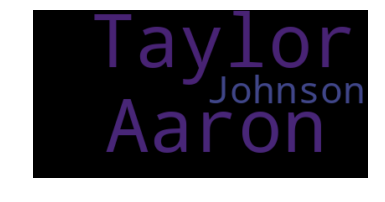

In [63]:
# Start with one review:
text = df2.CAST[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [276]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
plotly.offline.init_notebook_mode(connected=True)

# Read Excel Sheet
df1 = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="marvel")
df2 = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="movieCast")
df3 = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="actor")


In [302]:
import datetime

def to_unix_time(dt):
    epoch =  datetime.datetime.utcfromtimestamp(0)
    return (dt - epoch).total_seconds() * 1000


movie = df1['TITLE']
images = df1['IMAGES']
prodBudget = go.Scatter(
            x=df1['RELEASE DATE'],
            y=df1['PRODUCTION BUDGET'],
            name = "Production Budget",
            line = dict(color = '#7F7F7F'),
            opacity = 0.8,
            mode='lines+markers', 
            hovertext=movie,
            hoverlabel=dict(bgcolor='#7F7F7F'),
            marker=dict(symbol = "star",size =10)
        )

worldBox = go.Scatter(
            x=df1['RELEASE DATE'],
            y=df1['WORLDWIDE BOX OFFICE'],
            name = "Worldwide Box Office Collection",
            line = dict(color = '#17BECF'),
            opacity = 0.8,
            mode='lines+markers', 
            hovertext=movie,
            hoverlabel=dict(bgcolor='#17BECF'),
            marker=dict(symbol = "star", size = 10 ),
            
)
openWeek = go.Scatter(
            x=df1['RELEASE DATE'],
            y=df1['OPENING WEEKEND'],
            name = "Opening Weekend Collection",
            line = dict(color = '#F4D03F'),
            opacity = 0.8,
            mode='lines+markers', 
            hovertext=movie,
            hoverlabel=dict(bgcolor='#F4D03F'),
            marker=dict(symbol = "star", size = 10 ),
            
)
domesticBox = go.Scatter(
            x=df1['RELEASE DATE'],
            y=df1['DOMESTIC BOX OFFICE'],
            name = "Domestic Box Office Collection",
            line = dict(color = '#E74C3C'),
            opacity = 0.8,
            mode='lines+markers', 
            hovertext=movie,
            hoverlabel=dict(bgcolor='#E74C3C'),
            marker=dict(symbol = "star", size = 10 ),
            
)

data = [prodBudget,worldBox,domesticBox,openWeek]

updatemenus = list([
    dict(active=3,
         buttons=list([   
            dict(label = 'World Box Office Collection',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         ]),
            dict(label = 'Domestic Box Office Collection',
                 method = 'update',
                 args = [{'visible': [True, False, True, False]},
                         ]),
            dict(label = 'Opening Weekend Collection',
                 method = 'update',
                 args = [{'visible': [True, False, False, True]},
                         ]),
            dict(label = 'Reset',
                 method = 'update',
                 args = [{'visible': [True, True, True, True]},
                         ])
        ]),
    )
])

layout = go.Layout(    
    images= [dict(
                  source= "https://images.plot.ly/language-icons/api-home/python-logo.png",
                  xref= "x",
                  yref= "y",
                  #x= 0,
                  #y= 3,
                 # sizex= 2,
                 # sizey= 2,
                  sizing= "stretch",
                  opacity= 0.5,
                  layer= "below")],
                   title="Marvel Movie Collection in USD" ,yaxis =dict(title = 'Amount in USD',ticks = "inside" ),
                   xaxis =dict(range = [to_unix_time(datetime.datetime(2007, 1, 1)),
                                        to_unix_time(datetime.datetime(2021, 1, 1))],
                                        title= 'Date Released',ticks = "inside"),updatemenus=updatemenus
                  )


fig = go.Figure(data = data, layout = layout)

plotly.offline.iplot(fig)

In [191]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=df1['TITLE'],
    y=df1['WORLDWIDE BOX OFFICE'],
    name='WORLDWIDE BOX OFFICE'
)
trace2 = go.Bar(
    x=df1['TITLE'],
    y=df1['DOMESTIC BOX OFFICE'],
    name='DOMESTIC BOX OFFICE'
)

trace3 = go.Scatter(
    y=df1['IMDB RATING'],
    x=df1['TITLE'],
     name='IMDB Rating',
    yaxis='y2'
)
data = [trace1, trace2,trace3]
layout = go.Layout(
    barmode='group',
     yaxis=dict(
        title='Collection',
         titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        )
    ),
    yaxis2=dict(
        title='IMDB Rating',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='grouped-bar')

In [261]:
from IPython.display import Image, HTML
Image("C:/Users/Gautam/Desktop/marvel-images/Ant-Man.jpg")
df4 = [Image("C:/Users/Gautam/Desktop/marvel-images/Ant-Man.jpg"),Image("C:/Users/Gautam/Desktop/marvel-images/Ant-Man-and-the-Wasp.jpg")]

df4

In [271]:
img1 = Image("C:/Users/Gautam/Desktop/marvel-images/Ant-Man.jpg")
img2 = Image("C:/Users/Gautam/Desktop/marvel-images/Ant-Man-and-the-Wasp.jpg")
df4=[img1,img2]
#Image(df4)

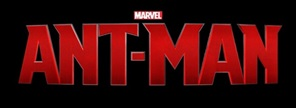

In [275]:
df4[0]

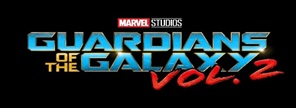

In [296]:
Image(df1['IMAGES'][14])

In [332]:
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        scatter.marker.color = c
        scatter.marker.size = s

In [335]:
import plotly.plotly as py
import plotly.graph_objs as go

images = df1['IMAGES']
pic = df1['LOGO']
trace3 = go.Scatter(
    y=df1['IMDB RATING'],
    x=df1['TITLE'],
    name='IMDB Rating'
      #hoverinfo='pic'
   # yaxis='y2'
)

trace3.on_click(update_point)

data = [trace3]
layout = go.Layout(
    barmode='group',
     yaxis=dict(
        title='IMDB Rating',
         titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='grouped-bar')

In [418]:
grade = df3['Franchise/Career']*100
print(grade)

    
def assignColor(grade):
    if grade >= 90:
        return '#E65100'  
    elif grade >=80:
          return  '#FF8F00'
    elif grade >=70:
          return  '#FBC02D'
    elif grade >= 60:
           return '#C0CA33' 
    elif grade >= 50:
           return '#8BC34A' 
    elif grade >= 40:
        return '#66BB6A' 
    elif grade >= 30:
        return '#4DB6AC'
    elif grade >= 20:
        return '#80DEEA' 
    elif grade >= 10:
        return '#B3E5FC'  
    else:
        return '#E3F2FD'
    
for n in grade:
    print (assignColor(n))

0      66.5
1      78.6
2      36.4
3      85.4
4      75.6
5      79.9
6      63.3
7      74.9
8      67.7
9      82.8
10     83.3
11     81.0
12     40.6
13     66.6
14     48.4
15     87.2
16     71.2
17     93.5
18     72.3
19     42.5
20     78.6
21     59.2
22     32.7
23     41.1
24     30.8
25     39.1
26     43.4
27     93.6
28     73.8
29     88.0
      ...  
61     38.0
62     95.7
63     95.8
64     20.6
65     99.3
66     60.3
67     98.6
68     33.0
69     49.6
70     23.5
71     43.9
72    100.0
73     99.8
74     70.3
75     50.3
76     96.3
77    100.0
78     80.3
79     95.6
80    100.0
81     93.3
82     99.8
83     69.1
84    100.0
85     92.1
86     75.3
87     99.3
88    100.0
89     60.6
90     98.9
Name: Franchise/Career, Length: 91, dtype: float64
#C0CA33
#FBC02D
#4DB6AC
#FF8F00
#FBC02D
#FBC02D
#C0CA33
#FBC02D
#C0CA33
#FF8F00
#FF8F00
#FF8F00
#66BB6A
#C0CA33
#66BB6A
#FF8F00
#FBC02D
#E65100
#FBC02D
#66BB6A
#FBC02D
#8BC34A
#4DB6AC
#66BB6A
#4DB6AC
#4DB6AC
#66BB6A
#

In [422]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
import math

#data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv")
#df_2007 = data[data['year']==2007]
#df_2007 = df_2007.sort_values(['continent', 'country'])
df_2007 = df3
slope = 2.666051223553066e-05
hover_text = []
bubble_size = []
color= []

# for index, row in df_2007.iterrows():
#     hover_text.append(('Country: {country}<br>'+
#                       'Life Expectancy: {lifeExp}<br>'+
#                       'GDP per capita: {gdp}<br>'+
#                       'Population: {pop}<br>'+
#                       'Year: {year}').format(country=row['country'],
#                                             lifeExp=row['lifeExp'],
#                                             gdp=row['gdpPercap'],
#                                             pop=row['pop'],
#                                             year=row['year']))
#     bubble_size.append(math.sqrt(row['pop']*slope))
    
for index, row in df3.iterrows():
    hover_text.append(('Name: {person} <br>'+'Character: {character} <br>'+'No. Of Appearances: {appearances}')
                      .format(person=row['Person'],character=row['Role'],appearances=row['Nr. Of Movies']))
    bubble_size.append(row['Nr. Of Movies']*slope)
    color.append(assignColor(row['Franchise/Career']*100))

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
df_2007['color'] = color

sizeref = 2.*max(df_2007['size'])/(100**2)

trace0 = go.Scatter(
    x=df3['Career Worldwide Box Office'],
    y=df3['Franchise Worldwide Box Office'],
    mode='markers',
    name='Africa',
    text=df_2007['text'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'],
        color=df_2007['color'],
       autocolorscale= False,
        showscale = True,
        line=dict(
            width=2
        ),
    )
)


#data = [trace0, trace1, trace2, trace3, trace4]
data = [trace0]
layout = go.Layout(
    title='Celebrity Appearances with Franchise Collection over Career Collection',
    xaxis=dict(
        title='Career Worldwide Box Office',
        gridcolor='#FDFEFE',
        type='log',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=5,
    ),
    yaxis=dict(
        title='Franchise Worldwide Box Office',
        gridcolor='#FDFEFE',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=5,
    ),
    paper_bgcolor='#FDFEFE',
    plot_bgcolor='#FDFEFE',
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='Celebrity Appearances')